<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220511.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* pandas functions
* regression
* one hot encoding

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime, time, date, timezone, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import sklearn.datasets as skd

# pandas functions

In [3]:
raw1 = skd.load_boston()
raw2 = skd.load_diabetes()
d3 = sns.load_dataset('titanic')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print([a for a,b in raw1.items()])
print([a for a,b in raw2.items()])

['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']
['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


In [5]:
print(raw1['data'][:3])
print('-'*10)
print(raw1['target'][:3])
print('-'*10)
print(np.concatenate((raw1['data'], raw1['target'].reshape(-1,1)), axis = 1)[:3])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
----------
[24.  21.6 34.7]
----------
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00 3.4700e+01]]


In [6]:
d1 = pd.DataFrame(np.concatenate((raw1['data'], raw1['target'].reshape(-1,1)), axis = 1), columns = np.concatenate((raw1['feature_names'], ['price'])))
d2 = pd.DataFrame(np.concatenate((raw2['data'], raw2['target'].reshape(-1,1)), axis = 1), columns = np.concatenate((raw2['feature_names'], ['target'])))

In [7]:
d1.columns = [a.lower() for a in d1.columns]
d1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
d2.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [9]:
d3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
d3.isnull().sum()[d3.isnull().sum()!=0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


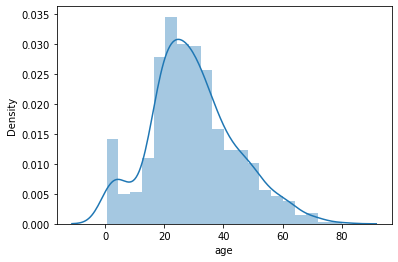

In [11]:
sns.distplot(d3['age'])

In [12]:
d3['age'] = d3['age'].fillna(np.mean(d3['age'])).astype(int)

In [13]:
d3[['embarked', 'embark_town']] = d3[['embarked', 'embark_town']].fillna(d3[['embarked', 'embark_town']].mode().iloc[0,0])

In [14]:
d3.drop('deck', inplace = True, axis = 1)
d3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [15]:
d3 = d3.assign(age_group = np.select([d3.age >= 60, d3.age >= 40, d3.age >= 20, d3.age >= 0], ['노년', '장년', '청년', '미성년']))
d3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,청년
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,청년
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,청년
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,청년
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,청년


In [16]:
cnt_age = d3.groupby(['age_group', 'sex'])['fare'].mean().reset_index()
cnt_age

,age_group,sex,fare
0,노년,female,60.698950
1,노년,male,40.335041
2,미성년,female,36.202113
3,미성년,male,28.080664
4,장년,female,60.523670
5,장년,male,30.538171
6,청년,female,43.148784
7,청년,male,22.912706


In [17]:
s1 = pd.pivot_table(cnt_age, index = 'sex', columns = 'age_group', values = 'fare')
s1.head()

age_group,노년,미성년,장년,청년
sex,,,,
female,60.698950,36.202113,60.523670,43.148784
male,40.335041,28.080664,30.538171,22.912706


In [18]:
s1 = s1.reset_index()
s1.columns.name = None
s1

,sex,노년,미성년,장년,청년
0,female,60.698950,36.202113,60.523670,43.148784
1,male,40.335041,28.080664,30.538171,22.912706


In [19]:
cnt_age

,age_group,sex,fare
0,노년,female,60.698950
1,노년,male,40.335041
2,미성년,female,36.202113
3,미성년,male,28.080664
4,장년,female,60.523670
5,장년,male,30.538171
6,청년,female,43.148784
7,청년,male,22.912706


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_

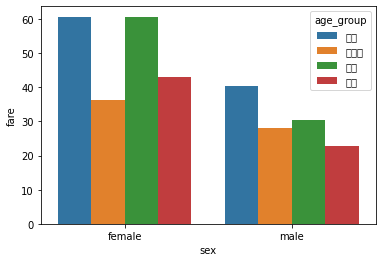

In [20]:
sns.barplot('sex', 'fare', hue = 'age_group', data = cnt_age)

# regression

In [21]:
[a for a, b in raw1.items()]

['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']

In [22]:
x = pd.DataFrame(raw1['data'], columns = raw1['feature_names'])
y = raw1['target']
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [24]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

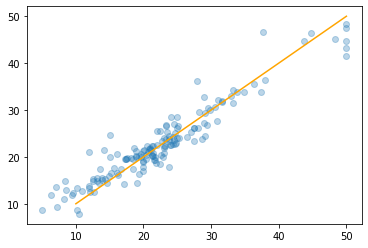

In [25]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([10,50], [10,50], color = 'orange')

In [26]:
fit_rf.score(x_tr, y_tr), fit_rf.score(x_te, y_te)

(0.9804885534651303, 0.8976049048868271)

# one hot encoding

In [27]:
d3['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [28]:
pd.get_dummies(d3, columns = ['embarked', 'age_group', 'sex'], prefix = ['embarked', 'age_group', 'sex']).head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,...,alone,embarked_C,embarked_Q,embarked_S,age_group_노년,age_group_미성년,age_group_장년,age_group_청년,sex_female,sex_male
0,0,3,22,1,0,7.2500,Third,man,True,Southampton,...,False,0,0,1,0,0,0,1,0,1
1,1,1,38,1,0,71.2833,First,woman,False,Cherbourg,...,False,1,0,0,0,0,0,1,1,0
2,1,3,26,0,0,7.9250,Third,woman,False,Southampton,...,True,0,0,1,0,0,0,1,1,0
3,1,1,35,1,0,53.1000,First,woman,False,Southampton,...,False,0,0,1,0,0,0,1,1,0
4,0,3,35,0,0,8.0500,Third,man,True,Southampton,...,True,0,0,1,0,0,0,1,0,1


In [29]:
e_list = list('SCQ')
d5 = sns.load_dataset('titanic')
d5.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
d5['embarked'] = d5['embarked'].fillna(d5['embarked'].mode()[0])
d5.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [31]:
for e in e_list :
  d5[f'embarked_{e}'] = d5['embarked'] == e

d5.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embarked_S,embarked_C,embarked_Q
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,True,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,False,False


In [36]:
from sklearn.preprocessing import OneHotEncoder


In [37]:
oh = OneHotEncoder(sparse = True)

In [50]:
fit_oh = oh.fit_transform(d5['embarked'].values.reshape(-1,1)).astype(int)


In [51]:
oh.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [52]:
# 제대로 출력 안됨 OneHotEncoder 다시 정리 필요
pd.DataFrame(fit_oh, columns = [f'embarked_{a}' for a in oh.categories_])

,embarked_['C' 'Q' 'S']
0,"(0, 2)\t1"
1,"(0, 0)\t1"
2,"(0, 2)\t1"
3,"(0, 2)\t1"
4,"(0, 2)\t1"
...,...
886,"(0, 2)\t1"
887,"(0, 2)\t1"
888,"(0, 2)\t1"
889,"(0, 0)\t1"
